In [40]:
import cv2
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np

import glob

from matplotlib.patches import Rectangle

from skimage.metrics import structural_similarity
from mpl_toolkits.axes_grid1 import ImageGrid

from deepface import DeepFace

import imageio
import torch
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

cmap = mpl.cm.Dark2.colors

In [104]:
def get_file_name(file_path):
    file_path_components = file_path.split('/')
    file_name_and_extension = file_path_components[-1].rsplit('.', 1)
    return file_name_and_extension[0]

def load_images(img_dir):
    img_path_list = [f for f in glob.glob(f"./{img_dir}/*.jpg")]
    images = []
    for img_path in img_path_list:
        # Load the image
        img = cv2.imread(img_path)
        # Convert the image to grayscale
        images.append(img)
    return images

# Load all images from the directory "dog"
#images = load_images("dog")
img_dir = "dfast/01_dfast_child"
images = load_images(img_dir)
img_path_list = [f for f in glob.glob(f"./{img_dir}/*.jpg")]
img_name_list = [get_file_name(f) for f in img_path_list]

In [96]:
def adjust_dim(images, dim=(500, 500)):
    adjusted_images = []

    for image in images:
        adjusted_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        adjusted_images.append(adjusted_image)

    return adjusted_images

images = adjust_dim(images)

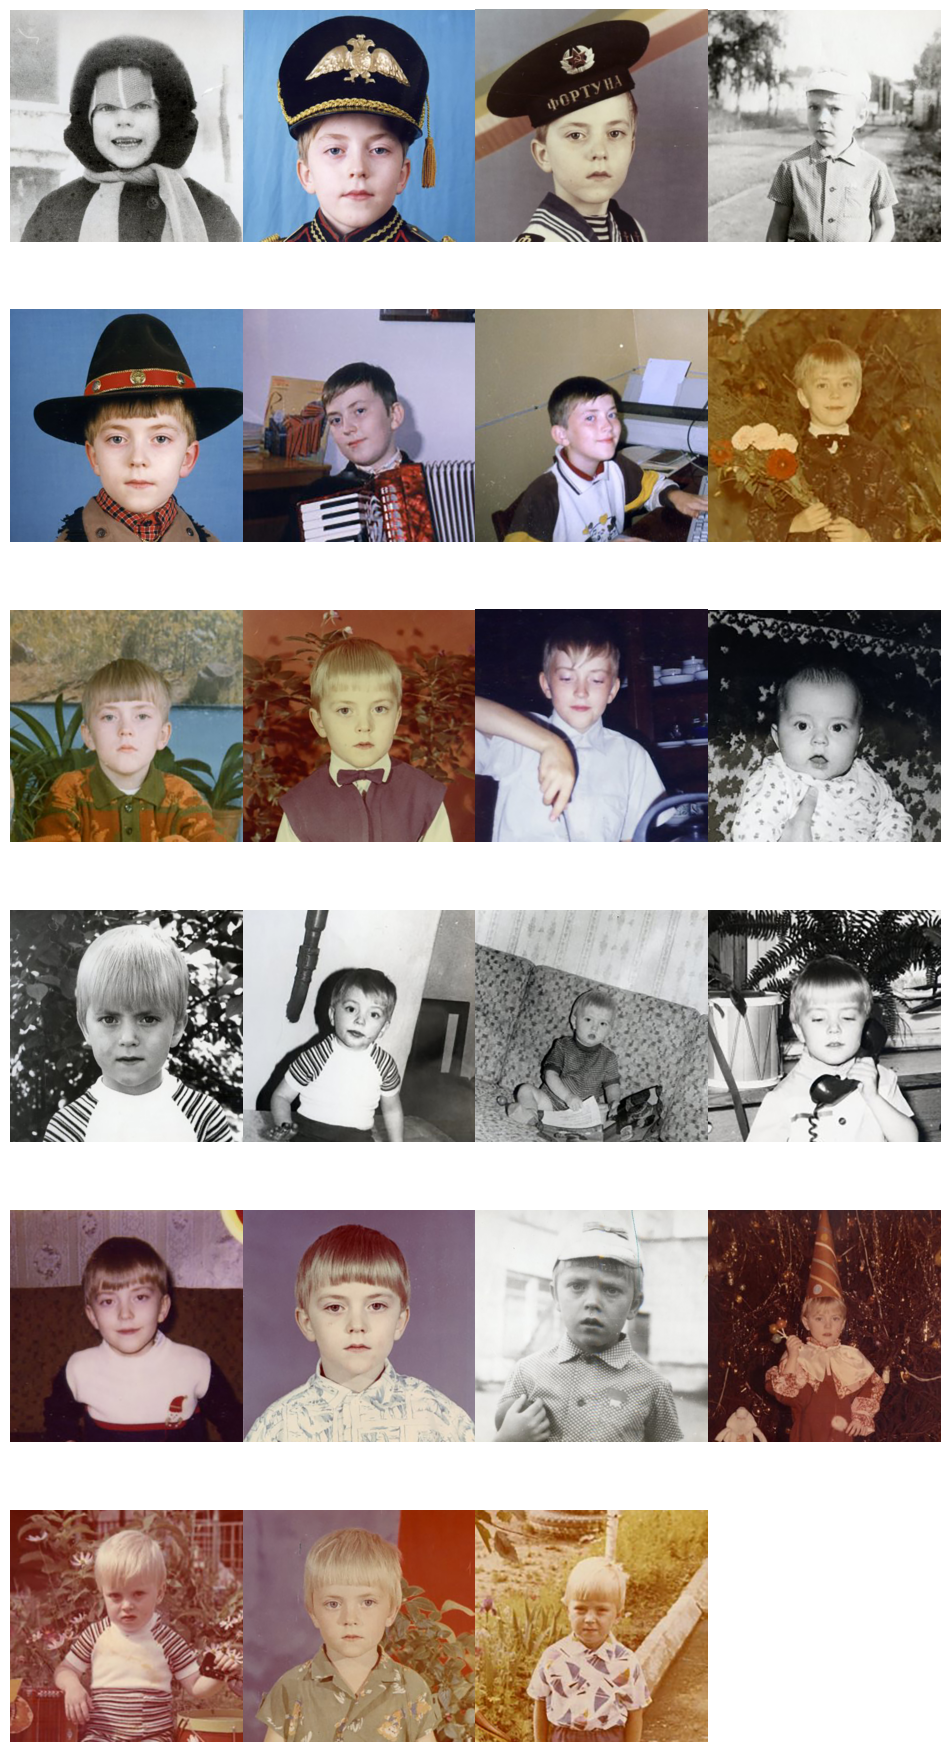

In [98]:
def plot_images(images, cols=4, figsize=(10,10), title=None, fontsize=12, title_color='black', space=(0.05, 0.05)):
    n_images = len(images)
    rows = math.ceil(n_images / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axs = axs.ravel()

    for i, ax in enumerate(axs):
        if i < n_images:
            ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
            ax.set_axis_off()
        else:
            fig.delaxes(ax)
    plt.subplots_adjust(top = 1, bottom = 0, wspace=space[0], hspace=space[1])
    if title:
        fig.suptitle(title, fontsize=fontsize, color=title_color, y=1.05)

# Plot the images in a grid with a maximum row length of 4 and specified space between images
plot_images(images, cols=4, space=(0.0, 0.0))

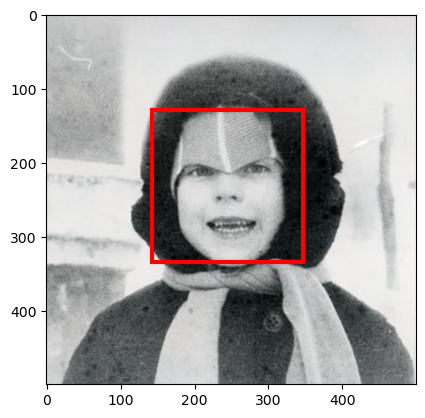

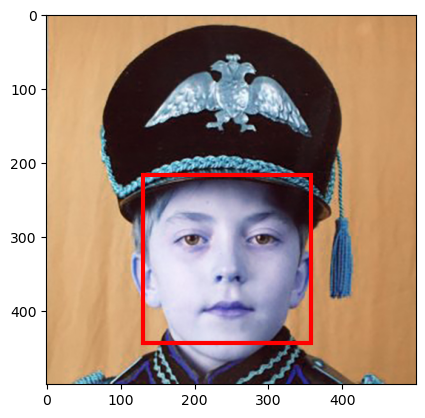

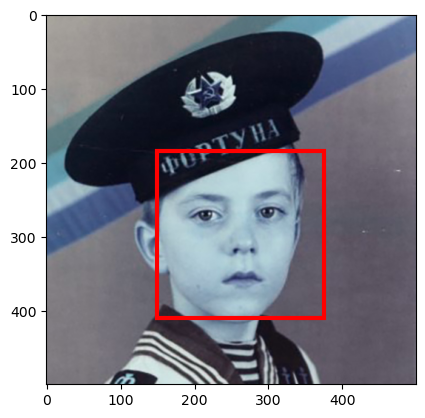

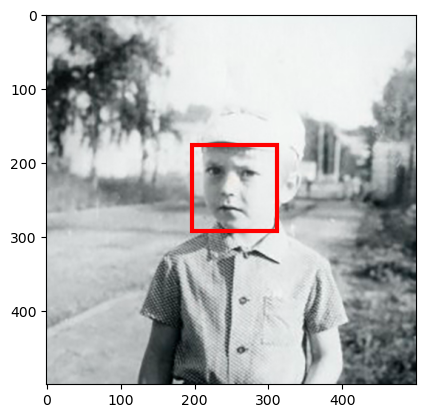

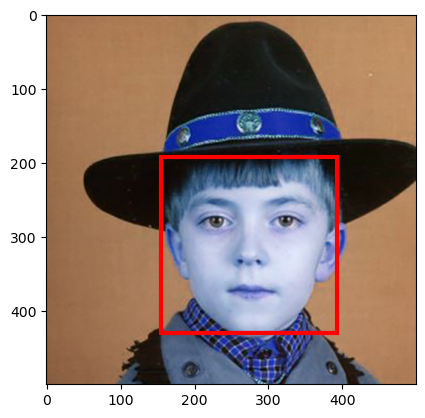

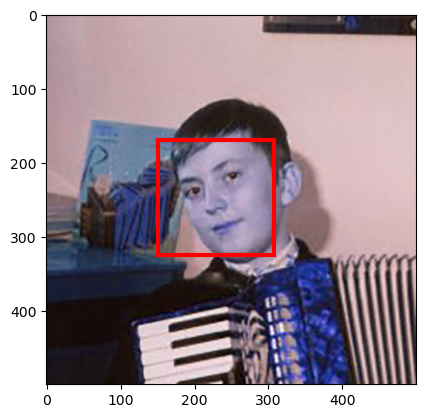

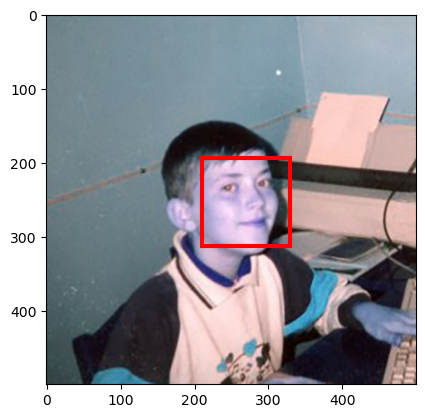

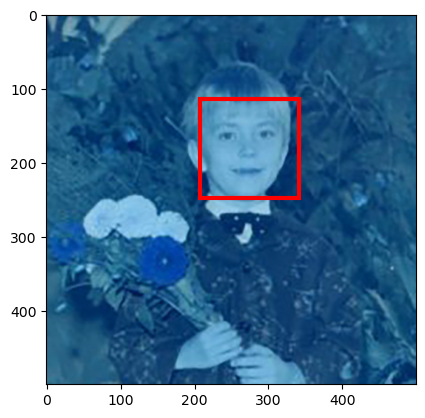

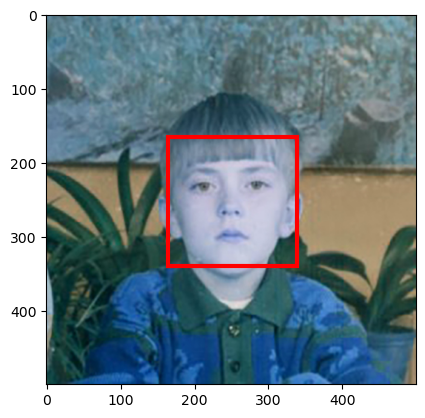

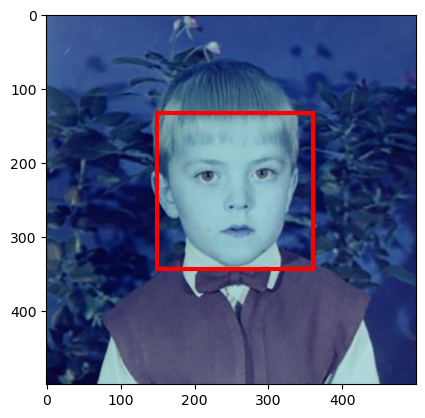

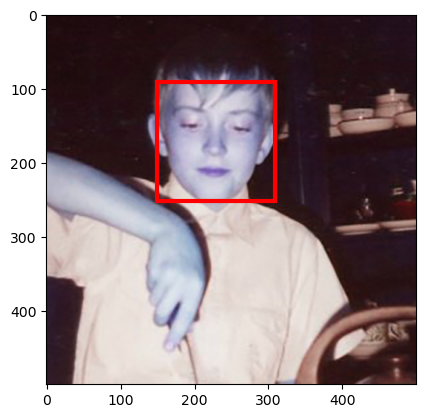

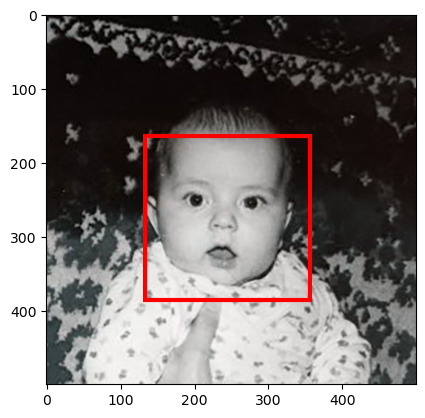

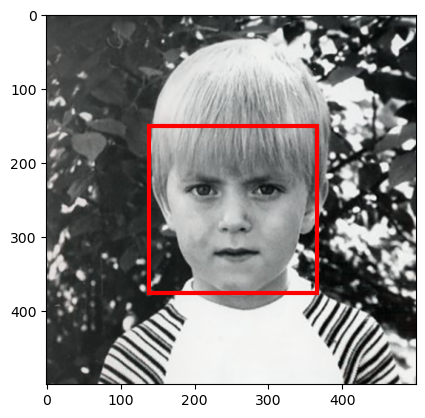

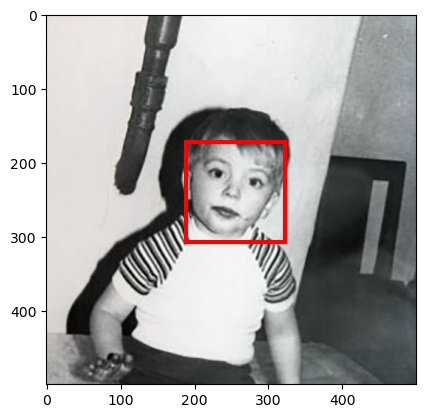

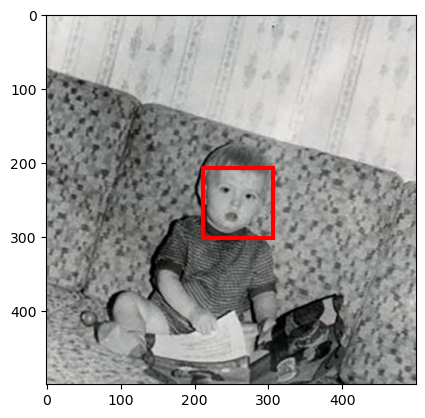

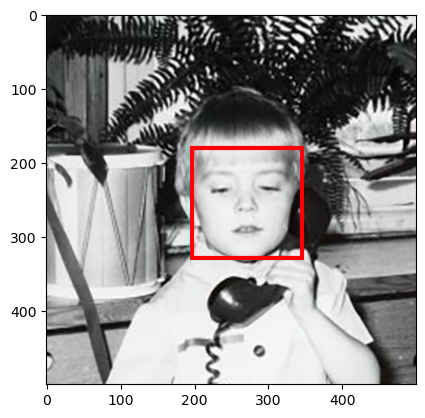

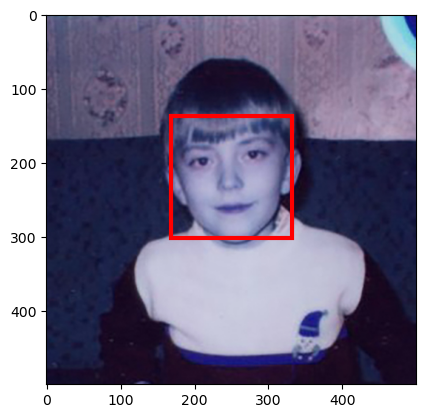

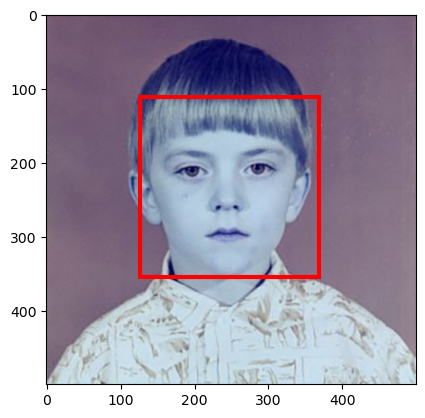

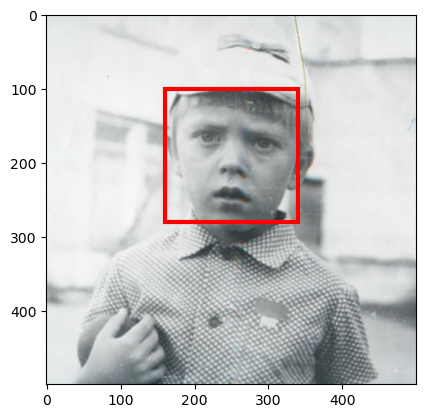

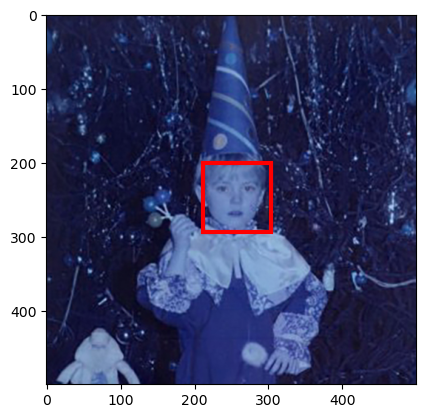

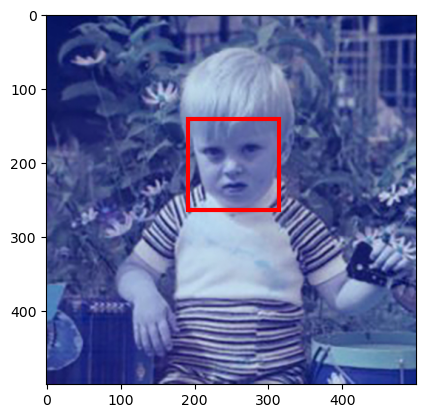

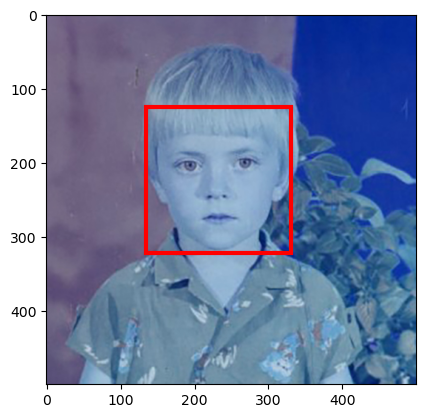

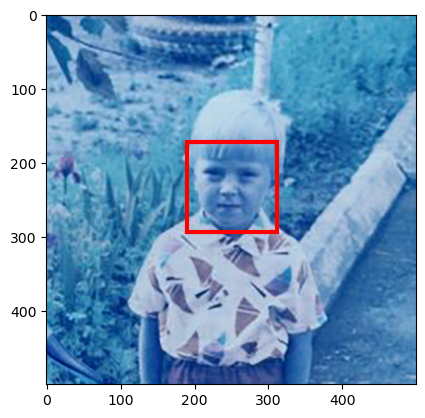

In [99]:
alg = "haarcascade_frontalface_default.xml"
haar_cascade = cv2.CascadeClassifier(alg)

for img in images:
    #img = images[3]
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face = haar_cascade.detectMultiScale(grayImg, 1.3, 4)

    fig, ax = plt.subplots()
    ax.imshow(img)
    for (x, y, w, h) in face:
        text = "Face Detected"
        #mpl.patches.Rectangle((x, y), w, h)
        ax.add_patch(Rectangle((x, y), w, h, edgecolor = 'red', fill=False, lw=3))

    plt.show()

In [106]:
def get_ssim_score(image1, image2):
    # Convert the images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    ssim = np.round(structural_similarity(image1_gray, image2_gray), 2)
    return ssim
#
# def get_fid_score(image1, image2):
#     # Convert the images to grayscale
#     image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
#     image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
#     ssim = np.round(structural_similarity(image1_gray, image2_gray), 2)
#     return ssim

# def get_ssim_matrix(images):
#     n_images = len(images)
#     ssim_matrix = np.zeros((n_images, n_images))
#     for i in np.arange(n_images):
#         for j in np.arange(n_images):
#             ssim_matrix[i, j] = get_ssim_score(images[i], images[j])
#     return ssim_matrix

def get_metric_matrix(images, metric, print_log=False):
    n_images = len(images)
    metric_matrix = np.zeros((n_images, n_images))

    for i in np.arange(n_images):
        for j in np.arange(n_images):
            if print_log == True:
                print(f'{img_name_list[i]}, {img_name_list[j]}')
            if metric == 'SSIM':
                res = get_ssim_score(images[i], images[j])
            if metric == 'FID':
                res = get_fid_score(images[i], images[j])
            if metric == 'face_verification':
                res = get_face_verification(images[i], images[j])
            if print_log == True:
                print(res)
            metric_matrix[i, j] = res
    return metric_matrix

metric = 'face_verification'

if metric == 'SSIM':
    metric_min_value = 0
    metric_max_value = 1
# Calculate the SSIM matrix
metric_matrix = get_metric_matrix(images, metric, print_log=True)

dfast_child_09, dfast_child_09
True
dfast_child_09, dfast_child_21
False
dfast_child_09, dfast_child_20
False
dfast_child_09, dfast_child_08
False
dfast_child_09, dfast_child_22
False
dfast_child_09, dfast_child_23
False
dfast_child_09, dfast_child_24
False
dfast_child_09, dfast_child_18
False
dfast_child_09, dfast_child_19
True
dfast_child_09, dfast_child_14
True
dfast_child_09, dfast_child_15
False
dfast_child_09, dfast_child_01
True
dfast_child_09, dfast_child_17
True
dfast_child_09, dfast_child_03
False
dfast_child_09, dfast_child_02
False
dfast_child_09, dfast_child_16
False
dfast_child_09, dfast_child_12
False
dfast_child_09, dfast_child_06
False
dfast_child_09, dfast_child_07
False
dfast_child_09, dfast_child_13
False
dfast_child_09, dfast_child_11
True
dfast_child_09, dfast_child_10
False
dfast_child_09, dfast_child_04
False
dfast_child_21, dfast_child_09
False
dfast_child_21, dfast_child_21
True
dfast_child_21, dfast_child_20
True
dfast_child_21, dfast_child_08
True
dfast_chil

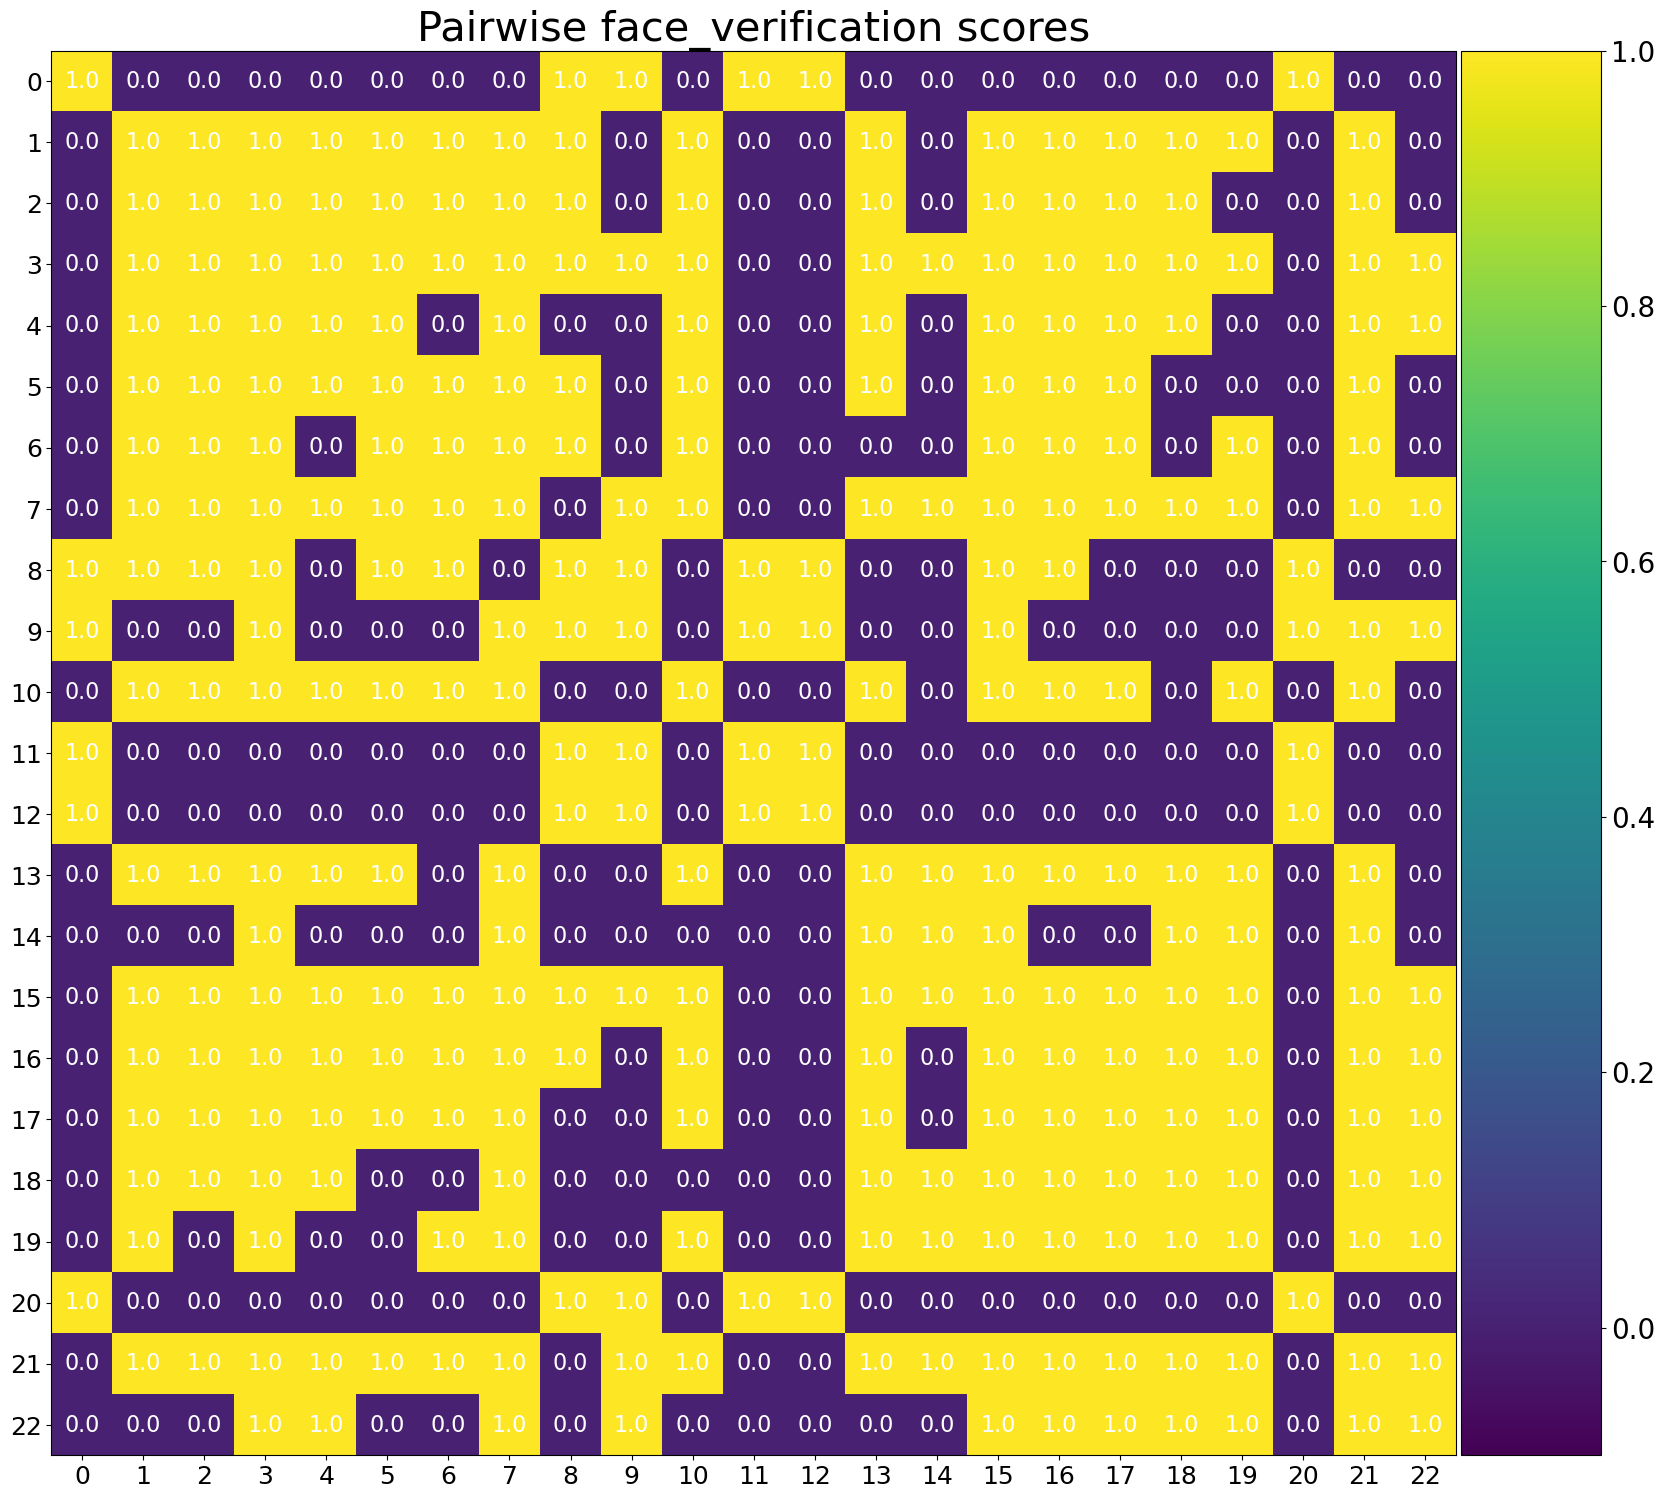

In [107]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1),
                 direction='row', axes_pad=0.05,
                 label_mode='1', share_all=False,
                 cbar_location='right', cbar_mode='single',
                 cbar_size='10%', cbar_pad=0.05)

ax = grid[0]
ax.set_title(f'Pairwise {metric} scores', fontsize=30)
ax.tick_params(axis='both', direction='out', labelsize=18)
im = ax.imshow(metric_matrix, interpolation='nearest', vmax=metric_min_value, vmin=metric_max_value)
ax.cax.colorbar(im)

ax.cax.tick_params(labelsize=20)
ax.set_xticks(np.arange(metric_matrix.shape[1]))
ax.set_xticklabels(np.arange(metric_matrix.shape[1]))
ax.set_yticks(np.arange(metric_matrix.shape[0]))
ax.set_yticklabels(np.arange(metric_matrix.shape[0]))

# xticks = range(len(images))
# yticks = range(len(images))
#
# ax.set_xticks(xticks)
# ax.set_yticks(yticks)
# ax.set_xticklabels([])
# ax.set_yticklabels([])

ax.grid(False)

for i in range(len(images)):
    for j in range(len(images)):
        text = ax.text(j, i, metric_matrix[i, j],
                       ha="center", va="center", color="w", size=16)

plt.show()

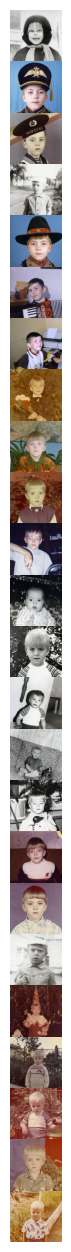

In [52]:
def plot_image_line(images, direction='h'):
    n_images = len(images)
    if direction == 'h':
        nrows = 1
        ncols = n_images
    elif direction == 'v':
        nrows = n_images
        ncols = 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
            ax.axis('off')

    plt.show()

plot_image_line(images, 'v')

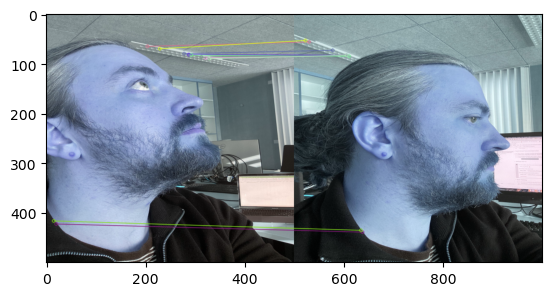

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the two images
img1 = images[0]
img2 = images[1]

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv2.SIFT_create()

# Compute keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Create BFMatcher object
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort the matches in order of distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot the matches
plt.imshow(img_matches)
plt.show()

In [14]:
img = images[2]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h),
                  (0, 0, 255), 2)

    faces = img[y:y + h, x:x + w]
    cv2.imshow("face",faces)
    #cv2.imwrite('face.jpg', faces)

cv2.imshow('img', img)

[ERROR:0@512.180] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/persistence.cpp (505) open Can't open file: 'haarcascade_frontalface_alt2.xml' in read mode


error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [16]:

DeepFace.verify(img1_path = "./training/IMG_5579.jpg", img2_path = "./training/IMG_5587.jpg")

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /Users/elena.fast/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [01:15<00:00, 7.70MB/s] 


{'verified': True,
 'distance': 0.2539391944177374,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 488, 'y': 427, 'w': 1665, 'h': 1665},
  'img2': {'x': 248, 'y': 660, 'w': 1588, 'h': 1588}},
 'time': 91.48}

In [58]:
img_dir = "dfast/01_dfast_child"
img_path_list = [f for f in glob.glob(f"./{img_dir}/*.jpg")]

In [61]:
for img_path in img_path_list:
    #objs_dict = dict()
    try:
        objs = DeepFace.analyze(img_path = img_path,
                                actions = ['age', 'gender', 'race', 'emotion']
                                )
        print(img_path)
        print({objs[0]['age'],
              objs[0]['dominant_gender'],
              objs[0]['dominant_race'],
              objs[0]['dominant_emotion']}
              )
    except:
        print(img_path)
        print("No face detected")
    #objs_dict[img_path] = objs

Action: emotion: 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


./dfast/01_dfast_child/dfast_child_09.jpg
{'white', 'Man', 36, 'surprise'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]


./dfast/01_dfast_child/dfast_child_21.jpg
{'white', 'Man', 28, 'neutral'}


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]


./dfast/01_dfast_child/dfast_child_20.jpg
{'Man', 27, 'white', 'neutral'}


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]


./dfast/01_dfast_child/dfast_child_08.jpg
{'white', 'Man', 28, 'sad'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]


./dfast/01_dfast_child/dfast_child_22.jpg
{'Man', 27, 'white', 'neutral'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


./dfast/01_dfast_child/dfast_child_23.jpg
{32, 'Man', 'white', 'happy'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]


./dfast/01_dfast_child/dfast_child_24.jpg
{'white', 28, 'happy', 'Woman'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


./dfast/01_dfast_child/dfast_child_18.jpg
{26, 'white', 'neutral', 'Woman'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]


./dfast/01_dfast_child/dfast_child_19.jpg
{32, 'Man', 'asian', 'neutral'}


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


./dfast/01_dfast_child/dfast_child_14.jpg
{'Woman', 'white', 'neutral', 39}


Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


./dfast/01_dfast_child/dfast_child_15.jpg
{26, 'white', 'sad', 'Woman'}


Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


./dfast/01_dfast_child/dfast_child_01.jpg
{'Man', 35, 'white', 'fear'}


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


./dfast/01_dfast_child/dfast_child_17.jpg
{'white', 'Man', 36, 'sad'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]


./dfast/01_dfast_child/dfast_child_03.jpg
{25, 'surprise', 'white', 'Woman'}


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]


./dfast/01_dfast_child/dfast_child_02.jpg
{24, 'Man', 'white', 'neutral'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]


./dfast/01_dfast_child/dfast_child_16.jpg
{'Man', 'white', 29, 'neutral'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


./dfast/01_dfast_child/dfast_child_12.jpg
{'Man', 27, 'white', 'happy'}


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


./dfast/01_dfast_child/dfast_child_06.jpg
{'sad', 'white', 21, 'Woman'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]


./dfast/01_dfast_child/dfast_child_07.jpg
{'Man', 'white', 'sad', 30}


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]


./dfast/01_dfast_child/dfast_child_13.jpg
{27, 'white', 'neutral', 'Woman'}
./dfast/01_dfast_child/dfast_child_05.jpg
No face detected


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


./dfast/01_dfast_child/dfast_child_11.jpg
{35, 'white', 'happy', 'Woman'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]


./dfast/01_dfast_child/dfast_child_10.jpg
{'Man', 19, 'white', 'sad'}


Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

./dfast/01_dfast_child/dfast_child_04.jpg
{'Man', 35, 'white', 'sad'}


In [100]:
models = [
    "ArcFace",
    "DeepID",
    #"DlibResNet",
    #"DlibWrapper",
    "Facenet",
    "Facenet512",
    #"FbDeepFace",
    "OpenFace",
    "SFace",
    "VGG-Face"
]

#face verification
#i = 0
for i in range(len(images)):
    #j = 0
    for j in range(len(images)):
        print(f'{img_path_list[i]} vs. {img_path_list[j]}')
        results = DeepFace.verify(img1_path = images[i],
                                  img2_path = images[j],
                                  #model_name = model
                                  )
        verified = results['verified']
        print(verified)
        #j += 1
    #i += 1

./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_09.jpg
True
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_21.jpg
False
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_20.jpg
False
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_08.jpg
False
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_22.jpg
False
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_23.jpg
False
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_24.jpg
False
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_18.jpg
False
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_19.jpg
True
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_child/dfast_child_14.jpg
True
./dfast/01_dfast_child/dfast_child_09.jpg vs. ./dfast/01_dfast_


KeyboardInterrupt



In [81]:
for image in images:
DeepFace.verify(img1_path = images[0],
                img2_path = images[1],
                #model_name = model
                )

{'verified': False,
 'distance': 0.569891728369556,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 143, 'y': 133, 'w': 202, 'h': 202},
  'img2': {'x': 122, 'y': 210, 'w': 242, 'h': 242}},
 'time': 6.9}

In [102]:
def get_face_verification(image1, image2, model='VGG-Face', print_log=False):
    results = DeepFace.verify(img1_path = image1,
                              img2_path = image2,
                              model_name = model
                              )
    face_verified = results['verified']
    return face_verified

In [84]:
get_face_verification(images[0], images[1])

False

In [59]:
print(objs_dict['./training/IMG_5580.jpg'][0]['age'],
      objs_dict['./training/IMG_5580.jpg'][0]['dominant_gender'],
      objs_dict['./training/IMG_5580.jpg'][0]['dominant_race'],
      objs_dict['./training/IMG_5580.jpg'][0]['dominant_emotion'],
      )

33 Man white neutral


In [ ]:
import io

import whatimage
import pyheif
from PIL import Image


def decodeImage(bytesIo):

    fmt = whatimage.identify_image(bytesIo)
    if fmt in ['heic', 'avif']:
        i = pyheif.read_heif(bytesIo)

        # Extract metadata etc
        for metadata in i.metadata or []:
            if metadata['type']=='Exif':
        # do whatever

        # Convert to other file format like jpeg
        s = io.BytesIO()
        pi = Image.frombytes(
            mode=i.mode, size=i.size, data=i.data)

        pi.save(s, format="jpeg")